In [2]:
# some code has been written using chatgpt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
#reading the data 
df = pd.read_csv('../data/full_survey_data.csv')

/var/folders/b3/glj_22g92pl25nkdvjvxnzz00000gn/T/ipykernel_24852/151919863.py:2: DtypeWarning: Columns (10,11,12,15,16,17,18,19,20,21,22,24,27,37,40,41,42,43,44,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,69,74,75,76,78,88,91,94,95,104,113,114,115,116,118,121,122,123,124,125,132,135,137,138,141,142,151,160,161,162,163,165,168,169,170,171,172,179,182,184,185,188,189,198,207,208,209,210,212,215,216,217,218,219,226,229,231,232,236,245,254,255,256,257,259,262,263,264,265,266,273,276,278,279,283,292,301,302,303,304,306,309,310,312,313,320,325,326,330,339,348,349,350,351,353,356,357,359,360,367,372,373,377,386,395,396,397,398,400,403,404,406,407,414,419,420,424,433,443,444,445,446,447,448,450,451,452,453,454,455,456,458,459,460,461,462,463,464,465,466,467,469,470,471,472,473,474,475,476,478,479,480,481,482,500,501,502,508,510,515,516,522,524,525,526,533,538,547,556,561,565,566,567,574,580,581,582,591,600,603,607,608,609,616,620,624,633,680,681,682,687,688,694,696,697,698,705,710

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54873 entries, 0 to 54872
Columns: 1599 entries, id_unique to x_duration
dtypes: float64(1027), int64(9), object(563)
memory usage: 669.4+ MB


In [34]:
df.id_unique.value_counts()

id_unique
bf_adn_2019_1_1      1
ng_glt_2019_133_1    1
ng_glt_2019_135_1    1
ng_glt_2019_136_1    1
ng_glt_2019_137_1    1
                    ..
gh_t10_2019_195_1    1
gh_t10_2019_196_1    1
gh_t10_2019_197_1    1
gh_t10_2019_198_1    1
zm_scn_2017_610_1    1
Name: count, Length: 54873, dtype: int64

In [11]:
df[df.crop_count.isna()].crop_residue_use_1.value_counts()

crop_residue_use_1
feed                                        572
other feed compost                          267
feed compost                                110
burn                                        103
feed construction sell                       68
                                           ... 
feed sell construction                        1
construction compost feed sell                1
burn fuel feed compost construction sell      1
feed construction compost                     1
compost construction sell feed                1
Name: count, Length: 128, dtype: int64

In [12]:
df.columns

Index(['id_unique', 'id_hh', 'id_rhomis_dataset', 'id_form', 'id_proj', 'year',
       'gps_lat_rounded', 'gps_lon_rounded', 'gps_alt', 'gps_source',
       ...
       'additional_respondents', 'quality_rapport', 'quality_reliability',
       'end_time_user', 'endtime_auto', 'endtime_calculated',
       'x_submission_time', 'x_tags', 'x_version', 'x_duration'],
      dtype='object', length=1599)

In [3]:
# Create a list for all crop_name and crop_residue_use columns
crop_cols = [f"crop_name_{i}" for i in range(1, 9)]
residue_cols = [f"crop_residue_use_{i}" for i in range(1, 9)]

In [ ]:
# Create a list of tuples for each crop's pair of name and residue
records = []
for i in range(1, 9):
    temp_df = df[['id_unique', f'crop_name_{i}', f'crop_residue_use_{i}']].copy()
    temp_df.columns = ['id_unique', 'crop_name', 'crop_residue_use']
    temp_df['crop_number'] = i
    records.append(temp_df)

# Concatenate all together
long_df = pd.concat(records, ignore_index=True)

# Drop rows where crop_name is NaN
#long_df = long_df.dropna(subset=['crop_name'])

#sort
long_df = long_df.sort_values(['id_unique', 'crop_number']).reset_index(drop=True)

In [5]:
long_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438984 entries, 0 to 438983
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id_unique         438984 non-null  object
 1   crop_name         112981 non-null  object
 2   crop_residue_use  103525 non-null  object
 3   crop_number       438984 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 13.4+ MB


In [30]:
long_df

,id_unique,crop_name,crop_residue_use,crop_number
0,bf_adn_2019_10_1,millet,soil feed,1
1,bf_adn_2019_10_1,groundnut,soil feed,2
2,bf_adn_2019_10_1,sesame,soil feed,3
3,bf_adn_2019_10_1,NaN,NaN,4
4,bf_adn_2019_10_1,NaN,NaN,5
...,...,...,...,...
438979,zm_scn_2017_9_1,NaN,NaN,4
438980,zm_scn_2017_9_1,NaN,NaN,5
438981,zm_scn_2017_9_1,NaN,NaN,6
438982,zm_scn_2017_9_1,NaN,NaN,7


In [39]:
long_df[long_df.id_unique == 'bf_adn_2019_14_1']

,id_unique,crop_name,crop_residue_use,crop_number
32,bf_adn_2019_14_1,millet,soil feed,1
33,bf_adn_2019_14_1,maize,soil feed,2
34,bf_adn_2019_14_1,NaN,soil feed,3
35,bf_adn_2019_14_1,NaN,NaN,4
36,bf_adn_2019_14_1,NaN,NaN,5
37,bf_adn_2019_14_1,NaN,NaN,6
38,bf_adn_2019_14_1,NaN,NaN,7
39,bf_adn_2019_14_1,NaN,NaN,8


In [41]:
df[df.id_unique == 'bf_adn_2019_14_1'][crop_cols] 

,crop_name_1,crop_name_2,crop_name_3,crop_name_4,crop_name_5,crop_name_6,crop_name_7,crop_name_8
13,millet,maize,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
long_df[long_df.crop_name.isna() & ~long_df.crop_residue_use.isna()]

,id_unique,crop_name,crop_residue_use,crop_number
34,bf_adn_2019_14_1,NaN,soil feed,3
121,bf_adn_2019_24_1,NaN,feed,2
161,bf_adn_2019_29_1,NaN,feed,2
240,bf_adn_2019_38_1,NaN,burn,1
297,bf_adn_2019_44_1,NaN,feed,2
...,...,...,...,...
428176,za_neo_2020_95_1,NaN,burn,1
428185,za_neo_2020_96_1,NaN,burn,2
428192,za_neo_2020_97_1,NaN,burn,1
428193,za_neo_2020_97_1,NaN,burn,2


In [6]:
final_crop_df = long_df[(long_df.crop_name.notna()) & (long_df.crop_residue_use.notna())]
final_crop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95962 entries, 0 to 438976
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_unique         95962 non-null  object
 1   crop_name         95962 non-null  object
 2   crop_residue_use  95962 non-null  object
 3   crop_number       95962 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.7+ MB


In [58]:
final_crop_df

,id_unique,crop_name,crop_residue_use,crop_number
0,bf_adn_2019_10_1,millet,soil feed,1
1,bf_adn_2019_10_1,groundnut,soil feed,2
2,bf_adn_2019_10_1,sesame,soil feed,3
8,bf_adn_2019_11_1,millet,feed soil,1
9,bf_adn_2019_11_1,maize,soil feed,2
...,...,...,...,...
438946,zm_scn_2017_96_1,sunflower,soil,3
438952,zm_scn_2017_97_1,maize,soil,1
438960,zm_scn_2017_98_1,maize,soil,1
438968,zm_scn_2017_99_1,maize,soil,1


In [ ]:
# find duplicates, same ID grows the sampe crop multiple times
final_crop_df[final_crop_df.crop_name == 'maize'].id_unique.value_counts()

id_unique
bf_ec3_2022_110_2    3
et_ta9_2019_133_1    3
bf_ec3_2022_114_2    3
et_ta9_2019_158_1    3
bf_ec3_2022_118_2    3
                    ..
gh_wre_2021_480_1    1
gh_wre_2021_47_1     1
gh_wre_2021_479_1    1
gh_wre_2021_478_1    1
zm_scn_2017_9_1      1
Name: count, Length: 19774, dtype: int64

In [8]:
df[df.id_unique == 'bf_ec3_2022_110_2'][crop_cols]

,crop_name_1,crop_name_2,crop_name_3,crop_name_4,crop_name_5,crop_name_6,crop_name_7,crop_name_8
537,maize,maize,maize,NaN,NaN,NaN,NaN,NaN


In [9]:
df[df.id_unique == 'bf_ec3_2022_110_2'][residue_cols]

,crop_residue_use_1,crop_residue_use_2,crop_residue_use_3,crop_residue_use_4,crop_residue_use_5,crop_residue_use_6,crop_residue_use_7,crop_residue_use_8
537,soil,soil,soil,NaN,NaN,NaN,NaN,NaN


In [10]:
final_crop_df = final_crop_df.drop_duplicates(subset=['id_unique', 'crop_name']).reset_index(drop=True)
final_crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94990 entries, 0 to 94989
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_unique         94990 non-null  object
 1   crop_name         94990 non-null  object
 2   crop_residue_use  94990 non-null  object
 3   crop_number       94990 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [11]:
final_crop_df['burn_crop'] = final_crop_df['crop_residue_use'].str.contains('burn', case=False, na=False).astype(int)


In [12]:
final_crop_df[final_crop_df.burn_crop == 1]

,id_unique,crop_name,crop_residue_use,crop_number,burn_crop
151,bf_cir_2018_28_1,rice,burn,3,1
228,bf_ec3_2022_104_2,millet,soil sell burn,2,1
231,bf_ec3_2022_104_2,sorghum,sell feed soil burn,5,1
233,bf_ec3_2022_105_2,millet,soil feed sell burn,2,1
235,bf_ec3_2022_105_2,sesame,soil burn,4,1
...,...,...,...,...,...
94874,zm_scn_2017_588_1,soya_bean,soil burn,2,1
94920,zm_scn_2017_607_1,soya_bean,burn,3,1
94940,zm_scn_2017_70_1,maize,soil burn,1,1
94970,zm_scn_2017_87_1,sunflower,soil burn,2,1


/var/folders/b3/glj_22g92pl25nkdvjvxnzz00000gn/T/ipykernel_19974/2949491794.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=burn_counts.index, y=burn_counts.values, palette=['#579db9', '#e37a61'])


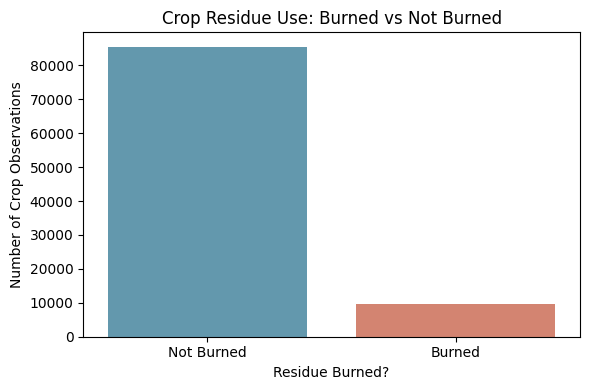

In [ ]:


# Count of burned vs not burned
burn_counts = final_crop_df['burn_crop'].value_counts().sort_index()
burn_counts.index = ['Not Burned', 'Burned']

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=burn_counts.index, y=burn_counts.values, palette=['#579db9', '#e37a61'])

plt.title("Crop Residue Use: Burned vs Not Burned")
plt.ylabel("Number of Crop Observations")
plt.xlabel("Residue Burned?")
plt.tight_layout()
plt.show()


/var/folders/b3/glj_22g92pl25nkdvjvxnzz00000gn/T/ipykernel_19974/2308435761.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=burn_by_crop.values, y=burn_by_crop.index, palette='rocket')


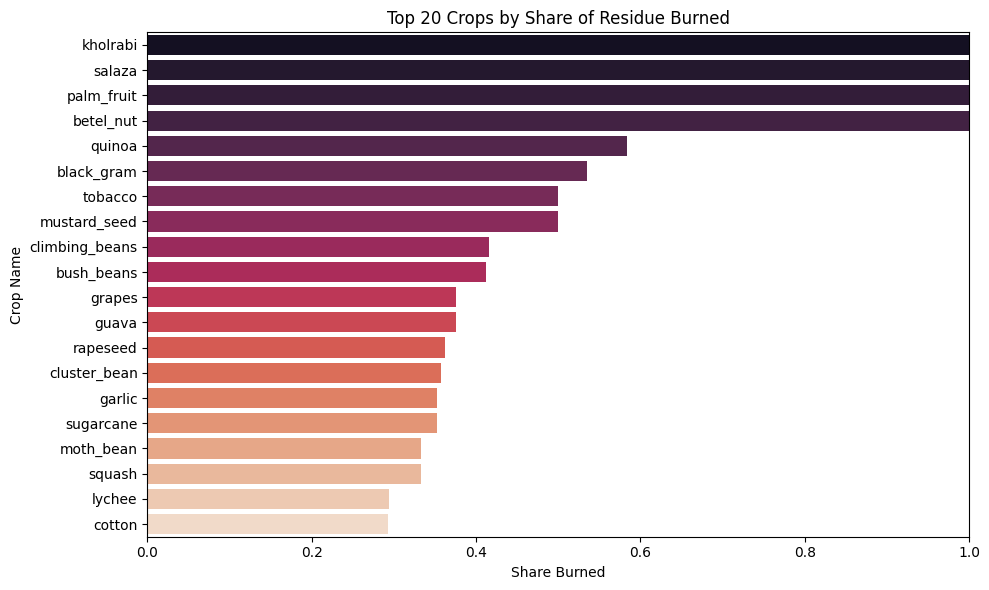

In [14]:
# Compute share of residue burned per crop, then select top 20
burn_by_crop = (
    final_crop_df.groupby('crop_name')['burn_crop']
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=burn_by_crop.values, y=burn_by_crop.index, palette='rocket')

plt.title("Top 20 Crops by Share of Residue Burned")
plt.xlabel("Share Burned")
plt.ylabel("Crop Name")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()



/var/folders/b3/glj_22g92pl25nkdvjvxnzz00000gn/T/ipykernel_12021/3900763009.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=burn_by_crop.values, y=burn_by_crop.index, palette='crest')


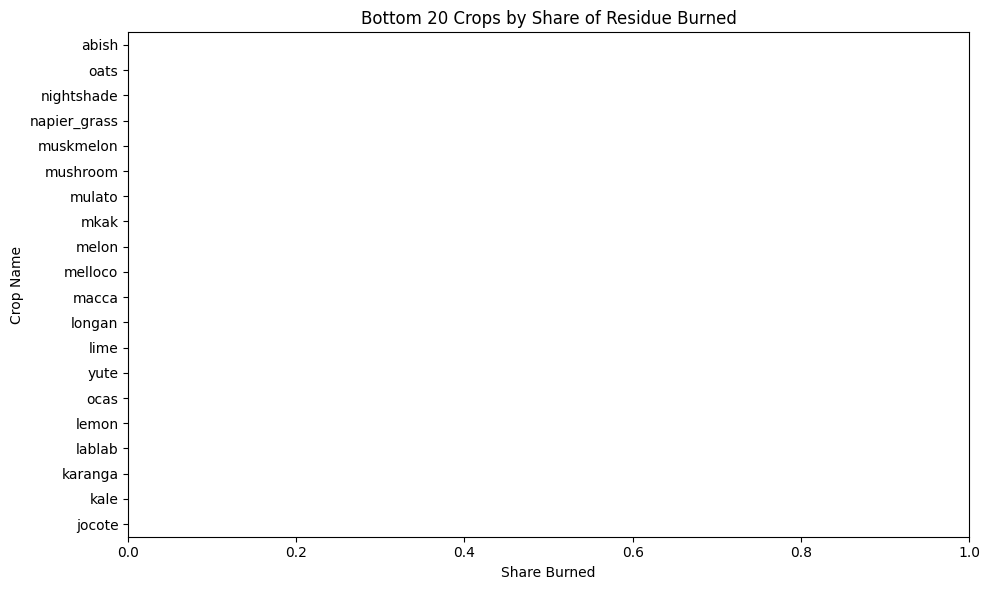

In [67]:
# Compute share of residue burned per crop, then select bottom 20
burn_by_crop = (
    final_crop_df.groupby('crop_name')['burn_crop']
    .mean()
    .sort_values(ascending=True)  # ascending is key here
    .head(20)
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=burn_by_crop.values, y=burn_by_crop.index, palette='crest')

plt.title("Bottom 20 Crops by Share of Residue Burned")
plt.xlabel("Share Burned")
plt.ylabel("Crop Name")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


In [68]:
final_crop_df[final_crop_df.crop_name == 'kholrabi']

,id_unique,crop_name,crop_residue_use,crop_number,burn_crop
406201,vn_csi_2020_50_1,kholrabi,burn,2,1


/var/folders/b3/glj_22g92pl25nkdvjvxnzz00000gn/T/ipykernel_19974/2240116817.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=burn_by_crop.values, y=burn_by_crop.index, palette='rocket')


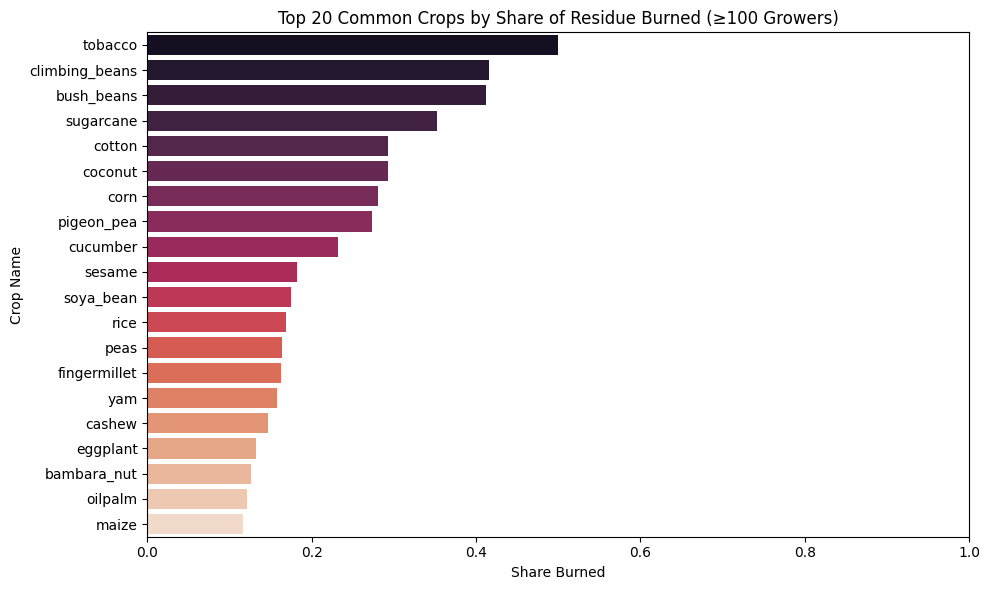

In [15]:
# let's look at crops which are grown by +100 people

crop_counts = final_crop_df['crop_name'].value_counts()

# Step 2: Keep only crops with at least 100 entries
common_crops = crop_counts[crop_counts >= 100].index

# Step 3: Filter the dataset
filtered_df = final_crop_df[final_crop_df['crop_name'].isin(common_crops)]

# Step 4: Compute burn share among common crops only
burn_by_crop = (
    filtered_df.groupby('crop_name')['burn_crop']
    .mean()
    .sort_values(ascending=False)
    .head(20)  # Top 20 among common crops
)

# Step 5: Plot
plt.figure(figsize=(10,6))
sns.barplot(x=burn_by_crop.values, y=burn_by_crop.index, palette='rocket')

plt.title("Top 20 Common Crops by Share of Residue Burned (≥100 Growers)")
plt.xlabel("Share Burned")
plt.ylabel("Crop Name")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

/var/folders/b3/glj_22g92pl25nkdvjvxnzz00000gn/T/ipykernel_19974/1946112411.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=burn_by_crop.values, y=burn_by_crop.index, palette='rocket')


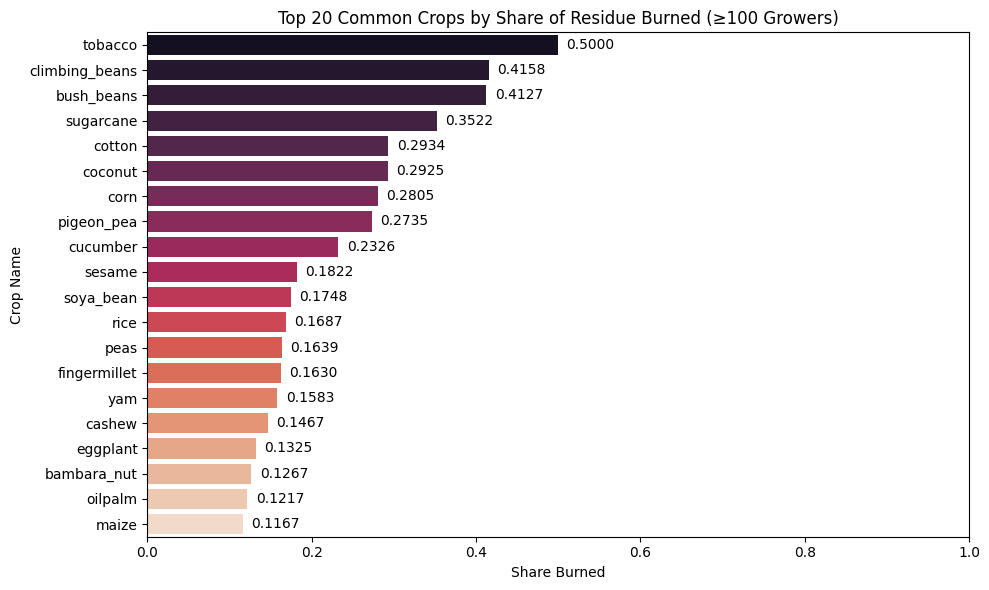

In [16]:

# Crop filtering and grouping
crop_counts = final_crop_df['crop_name'].value_counts()
common_crops = crop_counts[crop_counts >= 100].index
filtered_df = final_crop_df[final_crop_df['crop_name'].isin(common_crops)]

burn_by_crop = (
    filtered_df.groupby('crop_name')['burn_crop']
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

# Plot
plt.figure(figsize=(10,6))
ax = sns.barplot(x=burn_by_crop.values, y=burn_by_crop.index, palette='rocket')

plt.title("Top 20 Common Crops by Share of Residue Burned (≥100 Growers)")
plt.xlabel("Share Burned")
plt.ylabel("Crop Name")
plt.xlim(0, 1)

# Add annotations
for i, (value, name) in enumerate(zip(burn_by_crop.values, burn_by_crop.index)):
    ax.text(value + 0.01, i, f"{value:.4f}", va='center')  # +0.01 nudges text slightly right

plt.tight_layout()
plt.show()


In [17]:
final_crop_df[final_crop_df.crop_name == 'soya_bean'].burn_crop.value_counts()

burn_crop
0    642
1    136
Name: count, dtype: int64

In [93]:
136/(136+642)

0.17480719794344474

In [18]:

top20_crops = burn_by_crop.index

# Step 3: Filter filtered_df to only these top 20 crops
top20_df = filtered_df[filtered_df['crop_name'].isin(top20_crops)]

# Step 4: Create table with raw counts of burned vs not burned
burn_counts_table = pd.crosstab(
    top20_df['crop_name'],
    top20_df['burn_crop'],
    margins=True,
    margins_name='Total'
).rename(columns={0: 'Not Burned', 1: 'Burned'})

# Optional: sort by burn share descending (same order as burn_by_crop)
burn_counts_table = burn_counts_table.loc[top20_crops]

print(burn_counts_table)



burn_crop       Not Burned  Burned  Total
crop_name                                
tobacco                 69      69    138
climbing_beans         628     447   1075
bush_beans            1086     763   1849
sugarcane              344     187    531
cotton                 607     252    859
coconut                 75      31    106
corn                   277     108    385
pigeon_pea             324     122    446
cucumber                99      30    129
sesame                 884     197   1081
soya_bean              642     136    778
rice                  5698    1156   6854
peas                   102      20    122
fingermillet           113      22    135
yam                    505      95    600
cashew                 640     110    750
eggplant               144      22    166
bambara_nut            131      19    150
oilpalm                101      14    115
maize                17467    2307  19774


/var/folders/b3/glj_22g92pl25nkdvjvxnzz00000gn/T/ipykernel_19974/3568651503.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=burn_share_top20.values, y=burn_share_top20.index, palette='rocket')


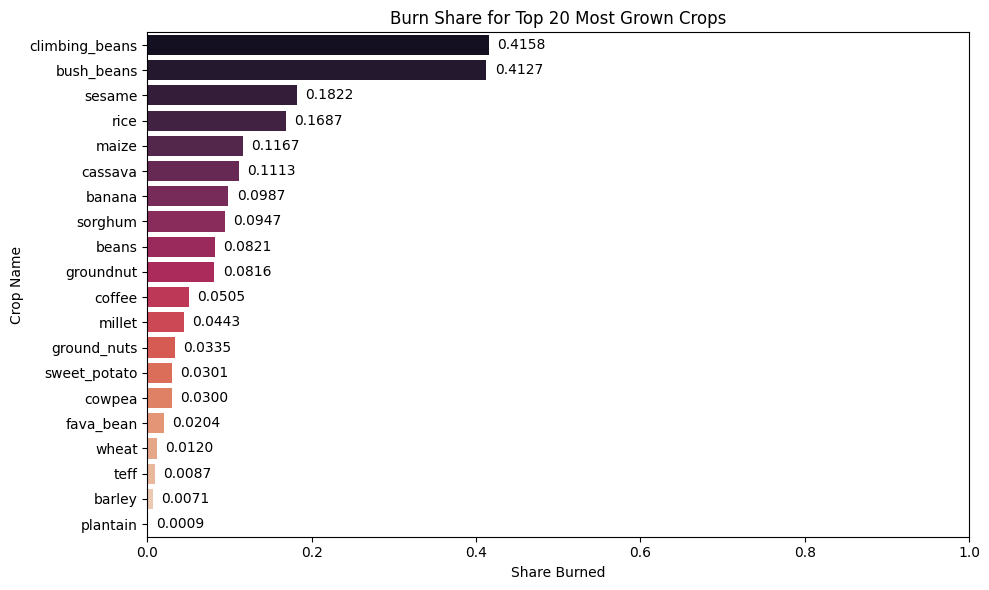

In [19]:
# Count total observations per crop (total growers)
crop_counts = final_crop_df['crop_name'].value_counts()

# Select top 20 most common crops
top20_most_grown = crop_counts.head(20).index

top20_df = final_crop_df[final_crop_df['crop_name'].isin(top20_most_grown)]

burn_share_top20 = (
    top20_df.groupby('crop_name')['burn_crop']
    .mean()
    .sort_values(ascending=False)
)
plt.figure(figsize=(10,6))
ax = sns.barplot(x=burn_share_top20.values, y=burn_share_top20.index, palette='rocket')

plt.title("Burn Share for Top 20 Most Grown Crops")
plt.xlabel("Share Burned")
plt.ylabel("Crop Name")
plt.xlim(0, 1)

# Annotate bars with burn share values
for i, value in enumerate(burn_share_top20.values):
    ax.text(value + 0.01, i, f"{value:.4f}", va='center')

plt.tight_layout()
plt.show()

In [20]:
burn_counts_table = pd.crosstab(
    top20_df['crop_name'],
    top20_df['burn_crop'],
    margins=True,
    margins_name='Total'
).rename(columns={0: 'Not Burned', 1: 'Burned'})

# Sort table rows in the same order as the plot
burn_counts_table = burn_counts_table.loc[burn_share_top20.index].sort_values('Total', ascending=False)

print(burn_counts_table)

burn_crop       Not Burned  Burned  Total
crop_name                                
maize                17467    2307  19774
millet                9733     451  10184
rice                  5698    1156   6854
beans                 5255     470   5725
sorghum               4897     512   5409
wheat                 4630      56   4686
cassava               4161     521   4682
groundnut             3318     295   3613
barley                2643      19   2662
cowpea                2099      65   2164
bush_beans            1086     763   1849
sweet_potato          1705      53   1758
banana                1379     151   1530
fava_bean             1391      29   1420
teff                  1372      12   1384
coffee                1166      62   1228
ground_nuts           1097      38   1135
plantain              1108       1   1109
sesame                 884     197   1081
climbing_beans         628     447   1075


In [21]:
# creating herd_size and renaming livestock head columns to be more succint
livestock_heads_cols = [
    'livestock_heads_sheep',
    'livestock_heads_cattle',
    'livestock_heads_pigs',
    'livestock_heads_goats',
    'livestock_heads_chicken',
    'livestock_heads_rabbits',
    'livestock_heads_otherpoultry',
    'livestock_heads_camel',
    'livestock_heads_guinea_pigs',
    'livestock_heads_oxen',
    'livestock_heads_buffalo',
    'livestock_heads_duck',
    'livestock_heads_geese',
    'livestock_heads_donkeys_horses',
    'livestock_heads_dogs',
    'livestock_heads_bees',
    'livestock_heads_fish'
]

# ok sum of heads to get herd_size
df['herd_size'] = df[livestock_heads_cols].sum(axis=1)

# Create a rename mapping
rename_dict = {
    col: col.replace('livestock_heads_', '') + '_heads'
    for col in df.columns if col.startswith('livestock_heads_')
}

# Apply the renaming
df = df.rename(columns=rename_dict)

In [ ]:
livestock_cols = [f'livestock_died_{i}' for i in range(1, 6)]
df.livestock_name_5

0         sheep
1        cattle
2          pigs
3        cattle
4        cattle
          ...  
54868    cattle
54869    cattle
54870    cattle
54871    cattle
54872    cattle
Name: livestock_name_1, Length: 54873, dtype: object

In [4]:
# Step 1: Select relevant columns
name_cols = [f'livestock_name_{i}' for i in range(1, 6)]
died_cols = [f'livestock_died_{i}' for i in range(1, 6)]

# Step 2: Melt the livestock names and deaths
names_long = df.melt(id_vars='id_unique', value_vars=name_cols, 
                     var_name='animal_slot', value_name='livestock_name')

died_long = df.melt(id_vars='id_unique', value_vars=died_cols, 
                    var_name='animal_slot', value_name='livestock_died')

# Step 3: Make sure they align by extracting index number
names_long['slot'] = names_long['animal_slot'].str.extract(r'(\d+)').astype(int)
died_long['slot'] = died_long['animal_slot'].str.extract(r'(\d+)').astype(int)

# Step 4: Merge the two long DataFrames
long_df = pd.merge(
    names_long[['id_unique', 'slot', 'livestock_name']],
    died_long[['id_unique', 'slot', 'livestock_died']],
    on=['id_unique', 'slot']
)

# Optional: drop rows where animal name is missing
long_df = long_df.dropna(subset=['livestock_name']).reset_index(drop=True)

# Result: Each row is (id_unique, livestock_name, livestock_died)
print(long_df.head())


         id_unique  slot livestock_name  livestock_died
0  bf_adn_2019_1_1     1          sheep             0.0
1  bf_adn_2019_2_1     1         cattle             0.0
2  bf_adn_2019_3_1     1           pigs             3.0
3  bf_adn_2019_4_1     1         cattle             0.0
4  bf_adn_2019_5_1     1         cattle             0.0


In [42]:
#check duplicates by id_unique and livestock_name
long_df[long_df.duplicated(subset=['id_unique', 'livestock_name'], keep=False)]


,id_unique,slot,livestock_name,livestock_died
420,bf_ec3_2022_9_2,1,otherpoultry,10.0
425,bf_ec3_2022_15_2,1,otherpoultry,0.0
434,bf_ec3_2022_27_2,1,goats,0.0
482,bf_ec3_2022_76_2,1,goats,0.0
514,bf_ec3_2022_109_2,1,chicken,2.0
...,...,...,...,...
81560,et_srl_2016_20_1,5,cattle,NaN
81561,et_srl_2016_154_1,5,goats,NaN
81562,et_srl_2019_2_2,5,bees,NaN
81563,et_srl_2019_5_2,5,chicken,NaN


In [14]:
df[df.id_unique == 'bf_ec3_2022_109_2'][name_cols]

,livestock_name_1,livestock_name_2,livestock_name_3,livestock_name_4,livestock_name_5
536,chicken,chicken,NaN,NaN,NaN


In [13]:
df[df.id_unique == 'bf_ec3_2022_109_2'][died_cols]

,livestock_died_1,livestock_died_2,livestock_died_3,livestock_died_4,livestock_died_5
536,2.0,2.0,NaN,NaN,NaN


In [33]:
long_df = long_df[long_df.livestock_died.notna()]

In [34]:
long_df

,id_unique,slot,livestock_name,livestock_died
0,bf_adn_2019_1_1,1,sheep,0.0
1,bf_adn_2019_2_1,1,cattle,0.0
2,bf_adn_2019_3_1,1,pigs,3.0
3,bf_adn_2019_4_1,1,cattle,0.0
4,bf_adn_2019_5_1,1,cattle,0.0
...,...,...,...,...
81614,tz_glv_2017_522_1,5,pigs,0.0
81615,tz_glv_2017_562_1,5,donkeys_horses,0.0
81616,tz_glv_2017_889_1,5,chicken,3.0
81617,tz_glv_2017_892_1,5,rabbits,0.0


In [17]:
avg_death_per_animal = long_df.groupby('livestock_name')['livestock_died'].mean().reset_index()
avg_death_per_animal = avg_death_per_animal.sort_values('livestock_died', ascending=False)
avg_death_per_animal

,livestock_name,livestock_died
5,cattle,210.066626
24,small_mammals,166.666667
12,fish,33.600000
23,sheep,11.821687
6,chicken,8.867582
22,rats,6.000000
9,donkeys_horses,5.687317
11,duck,5.228426
18,otherpoultry,5.226415
14,goats,5.050081


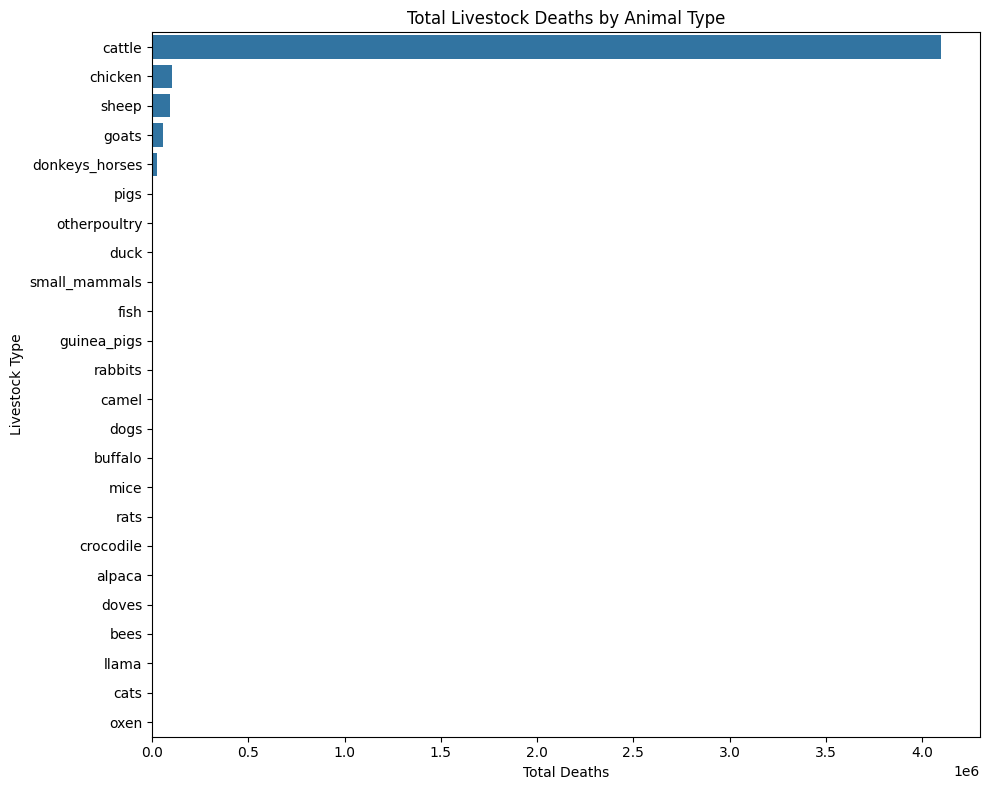

In [ ]:

deaths_by_animal = (
    long_df.groupby('livestock_name')['livestock_died']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(10, 8))
sns.barplot(data=deaths_by_animal, y='livestock_name', x='livestock_died')
plt.title('Total Livestock Deaths by Animal Type')
plt.xlabel('Total Deaths')
plt.ylabel('Livestock Type')
plt.tight_layout()
plt.show()



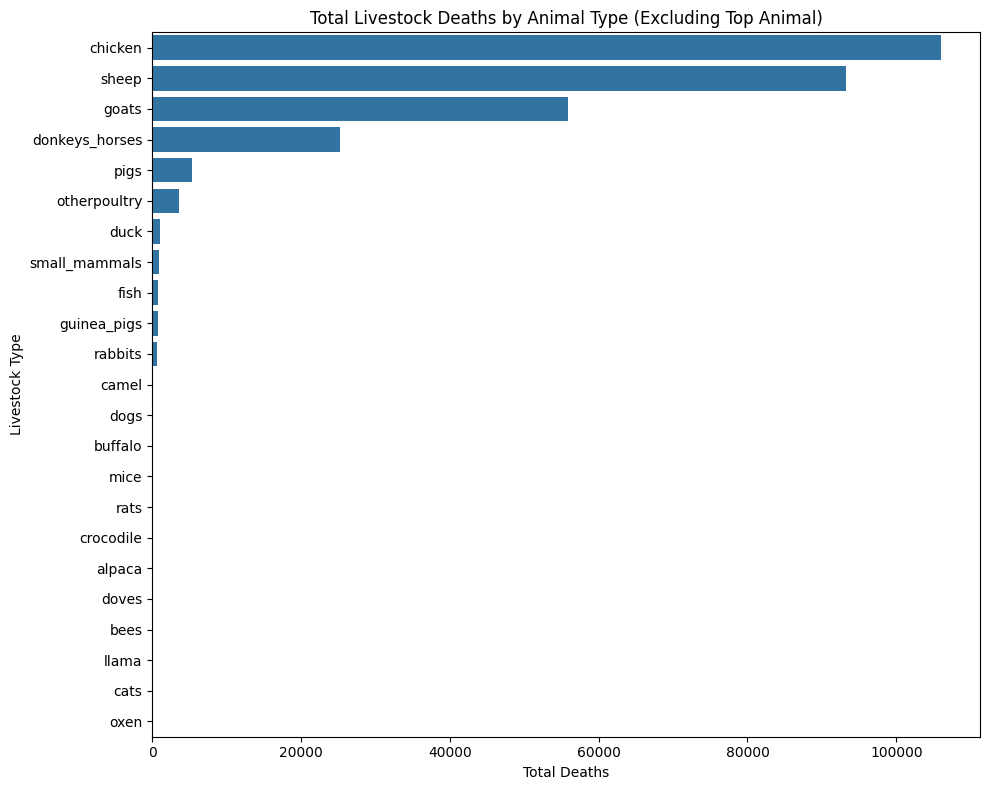

In [39]:

# Group, sort, and drop the top row
deaths_by_animal = (
    long_df.groupby('livestock_name')['livestock_died']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .iloc[1:]  # Skip the first (largest) animal
)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=deaths_by_animal, y='livestock_name', x='livestock_died')
plt.title('Total Livestock Deaths by Animal Type (Excluding Top Animal)')
plt.xlabel('Total Deaths')
plt.ylabel('Livestock Type')
plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Get all renamed head columns (they should now end with '_heads')
head_cols = [col for col in df.columns if col.endswith('_heads')]

# Step 2: Melt to long format
long_heads_df = df.melt(
    id_vars='id_unique',
    value_vars=head_cols,
    var_name='livestock_name',
    value_name='livestock_heads'
)

# Step 3: Clean the livestock name (remove '_heads' suffix)
long_heads_df['livestock_name'] = long_heads_df['livestock_name'].str.replace('_heads', '', regex=False)

# Step 4: Drop rows where heads is missing or zero (optional)
long_heads_df = long_heads_df[long_heads_df['livestock_heads'].notna()]


# Final output
print(long_heads_df.head())


         id_unique livestock_name  livestock_heads
0  bf_adn_2019_1_1          sheep              3.0
1  bf_adn_2019_2_1          sheep              3.0
3  bf_adn_2019_4_1          sheep              4.0
4  bf_adn_2019_5_1          sheep              4.0
5  bf_adn_2019_6_1          sheep             15.0


In [52]:
# check for duplicates in the long format
duplicates = long_heads_df[long_heads_df.duplicated(subset=['id_unique', 'livestock_name'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [id_unique, livestock_name, livestock_heads]
Index: []


In [53]:
df['herd_size'] = df[head_cols].sum(axis=1)

In [54]:
# Merge herd size into long_heads_df
long_heads_df = long_heads_df.merge(df[['id_unique', 'herd_size']], on='id_unique', how='left')

# Calculate proportion
long_heads_df['animal_share'] = long_heads_df['livestock_heads'] / long_heads_df['herd_size']

# Optional: handle divide-by-zero or NaN
long_heads_df['animal_share'] = long_heads_df['animal_share'].fillna(0)


In [57]:
# Flag dominant animal per household
long_heads_df['is_main_animal'] = long_heads_df.groupby('id_unique')['livestock_heads'].transform('max') == long_heads_df['livestock_heads']

# Filter to only dominant animals
dominant_animals = long_heads_df[long_heads_df['is_main_animal']]

main_animal_counts = (
    dominant_animals['livestock_name']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'livestock_name', 'livestock_name': 'num_households'})
)


# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=main_animal_counts, x='num_households', y='livestock_name')
plt.title('Most Commonly Dominant Animals per Household')
plt.xlabel('Number of Households')
plt.ylabel('Dominant Animal Type')
plt.tight_layout()
plt.show()



ValueError: Could not interpret value `livestock_name` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [58]:
print(main_animal_counts.columns)
print(main_animal_counts.head())


Index(['num_households', 'count'], dtype='object')
  num_households  count
0        chicken  22998
1         cattle   8850
2          goats   7797
3          sheep   5538
4           pigs   2715


In [60]:
# Step 2: Keep only dominant animals
dominant_animals = long_heads_df[long_heads_df['is_main_animal']]

# Step 3: Count how many times each animal is dominant
main_animal_counts = (
    dominant_animals['livestock_name']
    .value_counts(dropna=False)
    .reset_index()
)

# Step 4: Rename columns correctly
main_animal_counts.columns = ['livestock_name', 'num_households']

# Check result
print(main_animal_counts.head())

  livestock_name  num_households
0        chicken           22998
1         cattle            8850
2          goats            7797
3          sheep            5538
4           pigs            2715


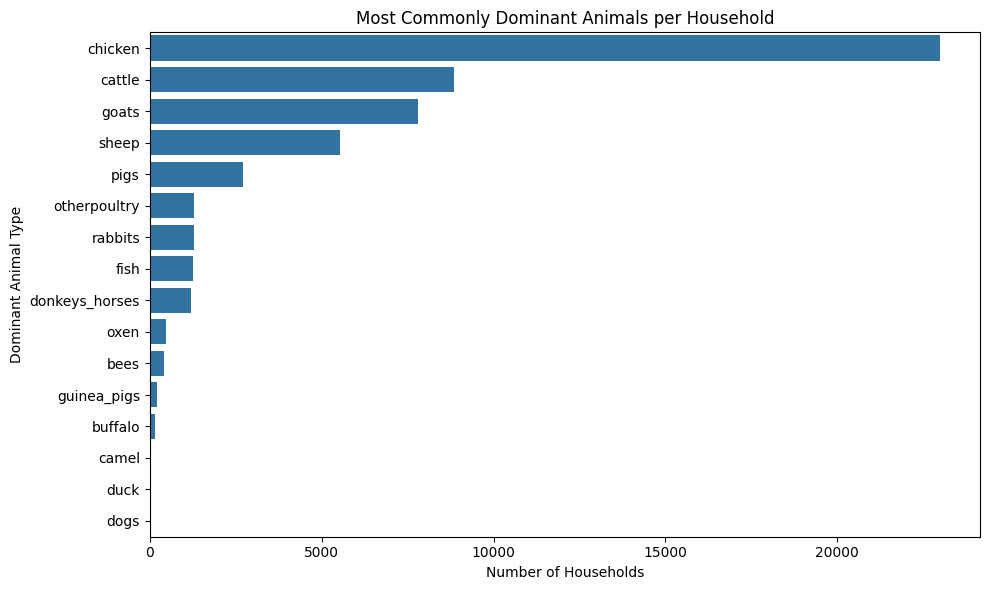

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(data=main_animal_counts, x='num_households', y='livestock_name')
plt.title('Most Commonly Dominant Animals per Household')
plt.xlabel('Number of Households')
plt.ylabel('Dominant Animal Type')
plt.tight_layout()
plt.show()

In [63]:
long_heads_df[long_heads_df.id_unique == 'bf_adn_2019_1_1']

,id_unique,livestock_name,livestock_heads,herd_size,animal_share,is_main_animal
0,bf_adn_2019_1_1,sheep,3.0,21.0,0.142857,False
55626,bf_adn_2019_1_1,goats,6.0,21.0,0.285714,False
77056,bf_adn_2019_1_1,chicken,10.0,21.0,0.476190,True
118711,bf_adn_2019_1_1,rabbits,2.0,21.0,0.095238,False


In [64]:
# Merge heads and deaths
combined_df = pd.merge(
    long_heads_df,
    long_df[['id_unique', 'livestock_name', 'livestock_died']],
    on=['id_unique', 'livestock_name'],
    how='outer'
)

# Drop rows where either heads or died is missing
combined_df = combined_df.dropna(subset=['livestock_heads', 'livestock_died'])

# Avoid divide-by-zero by filtering heads > 0
combined_df = combined_df[combined_df['livestock_heads'] > 0]

# Calculate mortality rate per animal per household
combined_df['mortality_rate'] = combined_df['livestock_died'] / combined_df['livestock_heads']


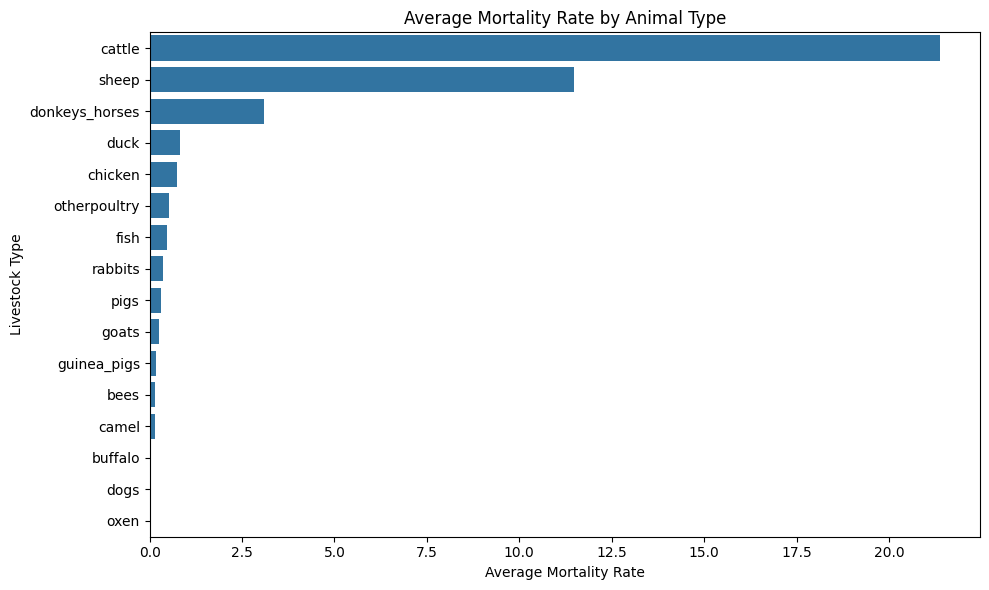

In [65]:
avg_mortality = (
    combined_df.groupby('livestock_name')['mortality_rate']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_mortality, x='mortality_rate', y='livestock_name')
plt.title('Average Mortality Rate by Animal Type')
plt.xlabel('Average Mortality Rate')
plt.ylabel('Livestock Type')
plt.tight_layout()
plt.show()


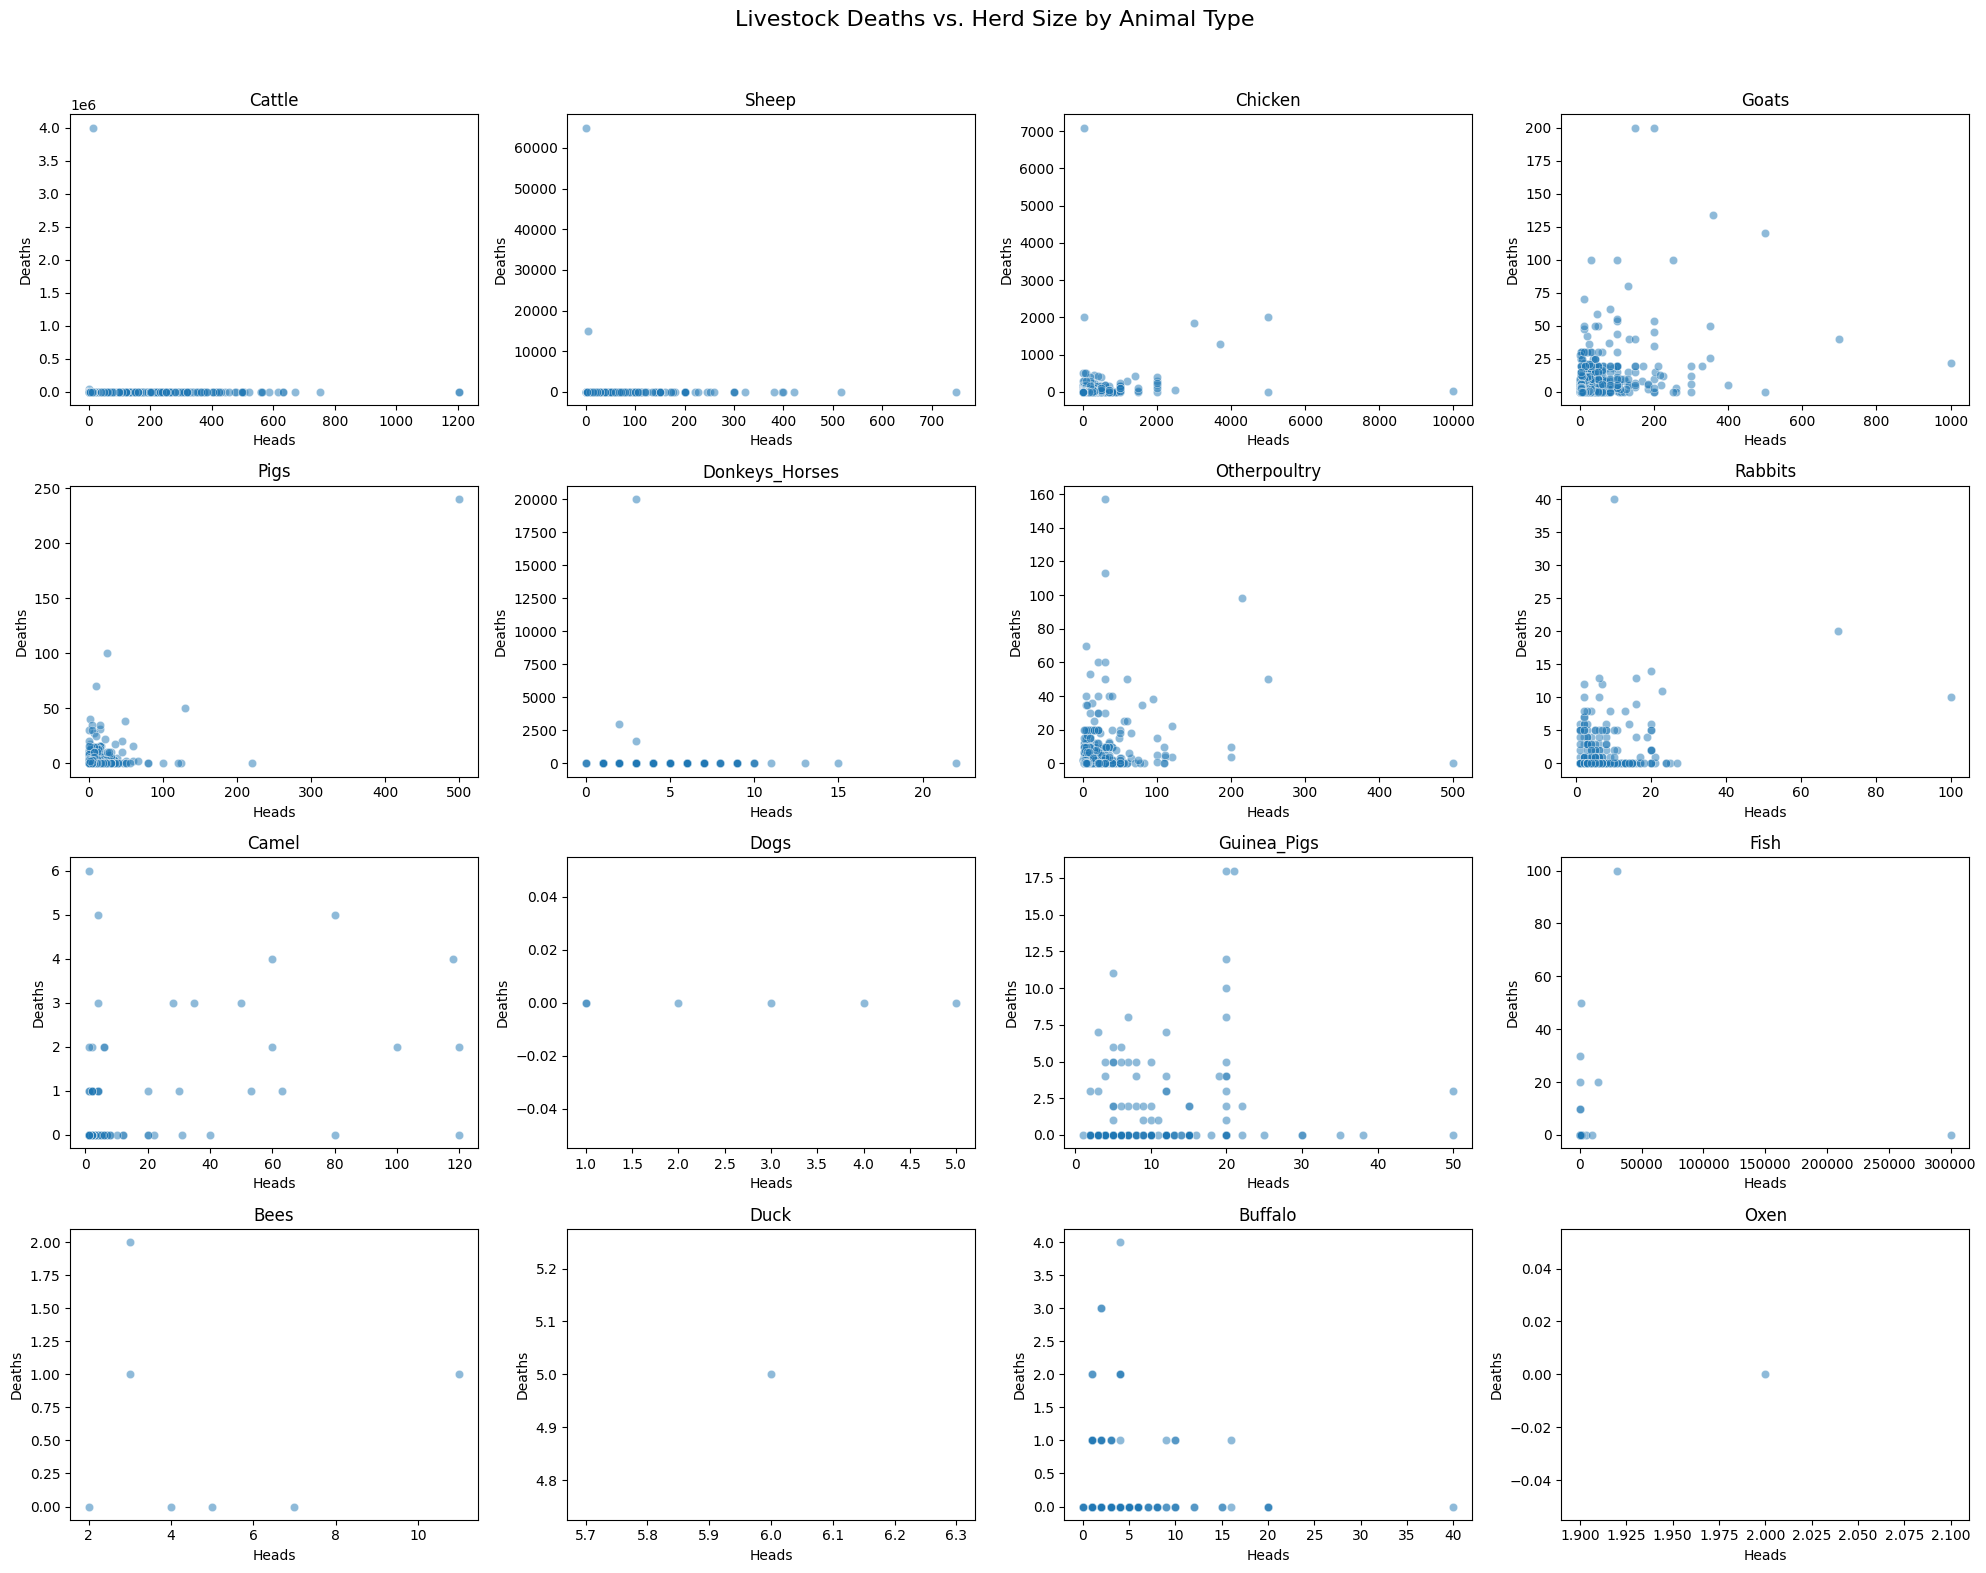

In [68]:
# Merge heads and deaths
combined_df = pd.merge(
    long_heads_df,
    long_df[['id_unique', 'livestock_name', 'livestock_died']],
    on=['id_unique', 'livestock_name'],
    how='outer'
)

# Drop rows where either heads or died is missing
combined_df = combined_df.dropna(subset=['livestock_heads', 'livestock_died'])



# Get unique animal types
animal_types = combined_df['livestock_name'].unique()
n_animals = len(animal_types)

# Set number of columns and rows for subplots
cols = 4
rows = math.ceil(n_animals / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), sharex=False, sharey=False)
axes = axes.flatten()

# Plot for each animal
for i, animal in enumerate(animal_types):
    ax = axes[i]
    subset = combined_df[combined_df['livestock_name'] == animal]
    sns.scatterplot(
        data=subset,
        x='livestock_heads',
        y='livestock_died',
        alpha=0.5,
        ax=ax
    )
    ax.set_title(animal.title())
    ax.set_xlabel('Heads')
    ax.set_ylabel('Deaths')

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Livestock Deaths vs. Herd Size by Animal Type', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



In [2]:
combined_df

NameError: name 'combined_df' is not defined